In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()

In [3]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
target = pd.DataFrame(housing.target, columns=['MEDV'])

In [6]:
data = pd.concat([df, target], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=46)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
y_pred

array([[2.81645359],
       [2.2860135 ],
       [1.63707276],
       ...,
       [2.39232926],
       [3.03199074],
       [2.70376808]])

In [11]:
print(f'Intercept:{model.intercept_}')
print(f'Coefficients:{model.coef_}')

Intercept:[-35.72749939]
Coefficients:[[ 4.44232070e-01  9.78573150e-03 -1.21606120e-01  6.40895333e-01
  -4.66625735e-06 -3.80061533e-03 -4.04650839e-01 -4.19742999e-01]]


In [12]:
print(f'Mean squared error:{mean_squared_error(y_test,y_pred)}')
print(f'R-squared:{r2_score(y_test,y_pred)}')

Mean squared error:0.5282392649244279
R-squared:0.6062353546443202


In [23]:
last_10_indices = range(len(y_test)-10, len(y_test))
last_10_y_test = y_test.iloc[last_10_indices]
last_10_y_pred = y_pred[last_10_indices]

last_10_y_test = np.ravel(last_10_y_test)
last_10_y_pred = np.ravel(last_10_y_pred)

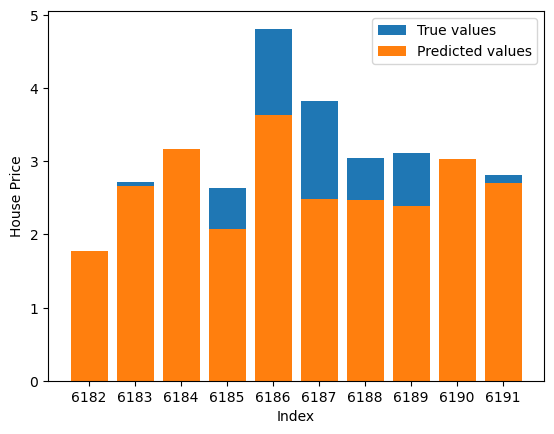

In [24]:
fig, ax = plt.subplots()
ax.bar(range(len(last_10_y_test)), last_10_y_test, label='True values')
ax.bar(range(len(last_10_y_pred)), last_10_y_pred, label='Predicted values')
ax.set_xticks(range(len(last_10_y_test)))
ax.set_xticklabels(last_10_indices)
ax.set_xlabel('Index')
ax.set_ylabel('House Price')
ax.legend()
plt.show()

In [17]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.4 MB/s eta 0:00:0000:0100:010m
  Using cached contourpy-1.0.7-cp310-cp310-macosx_11_0_arm64.whl (229 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.0 MB/s eta 0:00:00a 0:00:01m
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.9 MB/s eta 0:00:00a 0:00:01m
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
